In [25]:
import pandas as pd
import numpy as np
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
from tvDatafeed import TvDatafeed, Interval
import statistics
import matplotlib.pyplot as plt

In [26]:
tv=TvDatafeed()

In [27]:
df=tv.get_hist(symbol='NIFTY_50',exchange='NSE',interval=Interval.in_daily, n_bars=500)

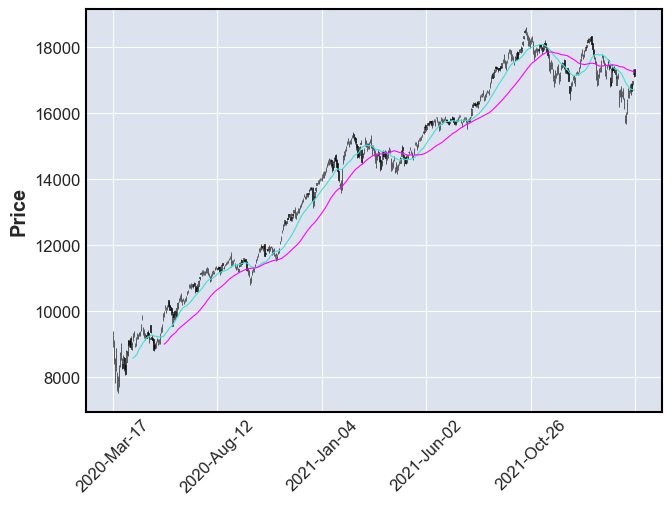

In [28]:
x=mpf.plot(df, type='candle', mav=(20,50))

In [29]:
df['SMA20']=df['close'].rolling(window=20).mean()
df['SMA50']=df['close'].rolling(window=50).mean()

In [30]:
df.to_csv('nifty50.csv')

In [31]:
close_list = df['close'].values
close_list

array([ 8967.0498,  8468.7998,  8263.4502,  8745.4502,  7610.25  ,
        7801.0498,  8317.8496,  8641.4502,  8660.25  ,  8281.0996,
        8597.75  ,  8253.7998,  8083.7998,  8792.2002,  8748.75  ,
        9111.9004,  8993.8496,  8925.2998,  8992.7998,  9266.75  ,
        9261.8496,  8981.4502,  9187.2998,  9313.9004,  9154.4004,
        9282.2998,  9380.9004,  9553.3496,  9859.9004,  9293.5   ,
        9205.5996,  9270.9004,  9199.0498,  9251.5   ,  9239.2002,
        9196.5498,  9383.5498,  9142.75  ,  9136.8496,  8823.25  ,
        8879.0996,  9066.5498,  9106.25  ,  9039.25  ,  9029.0498,
        9314.9502,  9490.0996,  9580.2998,  9826.1504,  9979.0996,
       10061.55  , 10029.1   , 10142.15  , 10167.45  , 10046.65  ,
       10116.15  ,  9902.    ,  9972.9004,  9813.7002,  9914.    ,
        9881.1504, 10091.65  , 10244.4   , 10311.2   , 10471.    ,
       10305.3   , 10288.9   , 10383.    , 10312.4   , 10302.1   ,
       10430.05  , 10551.7   , 10607.35  , 10763.65  , 10799.6

In [32]:
sma20_list = df['SMA20'].values
sma50_list = df['SMA50'].values

In [33]:
buy = 0
sell = 0
pos_held = 0
startBal = 1500
balance = startBal

In [34]:
sell_arr = []
buy_arr = []
max_sell_arr = []
min_buy_arr = []


for i in range(50, len(close_list)):
    ma20 = sma20_list[i]
    ma50 = sma50_list[i]
    if ma50 > ma20:
        sell_arr.append(close_list[i])
    else:
        if len(sell_arr) > 0:
            max_sell_arr.append(max(sell_arr))
        sell_arr.clear()
if len(sell_arr) > 0:
    max_sell_arr.append(max(sell_arr))
print("SELL " + str(max_sell_arr))
for i in range(50, len(close_list)):
    ma20 = sma20_list[i]
    ma50 = sma50_list[i]
    if ma50 < ma20:
        buy_arr.append(close_list[i])
    else:
        if len(buy_arr) > 0:
            min_buy_arr.append(min(buy_arr))
        buy_arr.clear()
if len(buy_arr) > 0:
    min_buy_arr.append(min(buy_arr))
print("BUY " + str(min_buy_arr))

SELL [15108.1, 18257.801, 17352.449]
BUY [9813.7002, 14906.05, 16842.801]


In [35]:
for i in range(50, len(close_list)):
    # ma20 = sma20_list[i]
    # ma50 = sma50_list[i]
    last_price = close_list[i]
    if last_price in min_buy_arr and not pos_held:
        balance -= last_price
        pos_held = True
        buy += 1
    elif last_price in max_sell_arr and pos_held:
        balance += last_price
        pos_held = False
        sell += 1


In [36]:
print("Buys: " + str(buy))
print("Sells: " + str(sell))

if buy > sell:
    balance += close_list[-1]


print("Final Balance: " + str(balance))

print("Profit if held: " + str(close_list[-1] - close_list[50]))
print("Profit from algorithm: " + str(balance - startBal))

Buys: 3
Sells: 3
Final Balance: 10655.798800000002
Profit if held: 7056.049999999999
Profit from algorithm: 9155.798800000002
